In [1]:

#Dr.Muhammad Atta Khafagy
#Alhussein_Nageh_Hofny
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus


In [2]:
#Load Dataset
studentData = pd.read_csv("Records on Students Fails in Each Semester.csv")
studentData.head()

,NEWID,Failed_101,Failed_102,Failed_201,Failed_202,Failed_301
0,1,P,A,A,A,A
1,2,A,A,P,A,A
2,3,P,P,P,P,A
3,4,A,A,A,A,A
4,5,A,A,A,A,A


In [3]:
#Convert Dataset to Dataframes
le = LabelEncoder()
studentData = studentData.apply(le.fit_transform)
studentData.head()

,NEWID,Failed_101,Failed_102,Failed_201,Failed_202,Failed_301
0,0,1,0,0,0,0
1,1,0,0,1,0,0
2,2,1,1,1,1,0
3,3,0,0,0,0,0
4,4,0,0,0,0,0


In [4]:
feature_cols = ['NEWID', 'Failed_101', 'Failed_102', 'Failed_201', 'Failed_202']
feature_cols = studentData[feature_cols] # Features
target_col= studentData.Failed_301 # Target variable



In [5]:
X_train, X_test, y_train, y_test = train_test_split(feature_cols,target_col, test_size=0.3, random_state=0)

In [6]:
def preprocess_features(X):
    outX = pd.DataFrame(index=X.index)


    for col, col_data in X.iteritems():

        if col_data.dtype == object:
            col_data = col_data.replace(['A', 'P'], [1, 0])



        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)

        outX = outX.join(col_data)
    return outX



X_all = preprocess_features(feature_cols)
print("Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns)))
print("\n", feature_cols)

Processed feature columns (5):-
['NEWID', 'Failed_101', 'Failed_102', 'Failed_201', 'Failed_202']

      NEWID  Failed_101  Failed_102  Failed_201  Failed_202
0        0           1           0           0           0
1        1           0           0           1           0
2        2           1           1           1           1
3        3           0           0           0           0
4        4           0           0           0           0
..     ...         ...         ...         ...         ...
162    162           0           0           0           0
163    163           0           0           1           0
164    164           0           0           0           0
165    165           0           0           0           0
166    166           0           1           1           1

[167 rows x 5 columns]


In [7]:

clf = DecisionTreeClassifier()


clf = clf.fit(X_train,y_train)


y_pred = clf.predict(X_test)

In [33]:

predict_flower = clf.predict(feature_cols)
print(feature_cols)
print("Accuracy: ",metrics.accuracy_score(target_col, predict_flower))

     NEWID  Failed_101  Failed_102  Failed_201  Failed_202
0        0           1           0           0           0
1        1           0           0           1           0
2        2           1           1           1           1
3        3           0           0           0           0
4        4           0           0           0           0
..     ...         ...         ...         ...         ...
162    162           0           0           0           0
163    163           0           0           1           0
164    164           0           0           0           0
165    165           0           0           0           0
166    166           0           1           1           1

[167 rows x 5 columns]
Accuracy:  0.9820359281437125


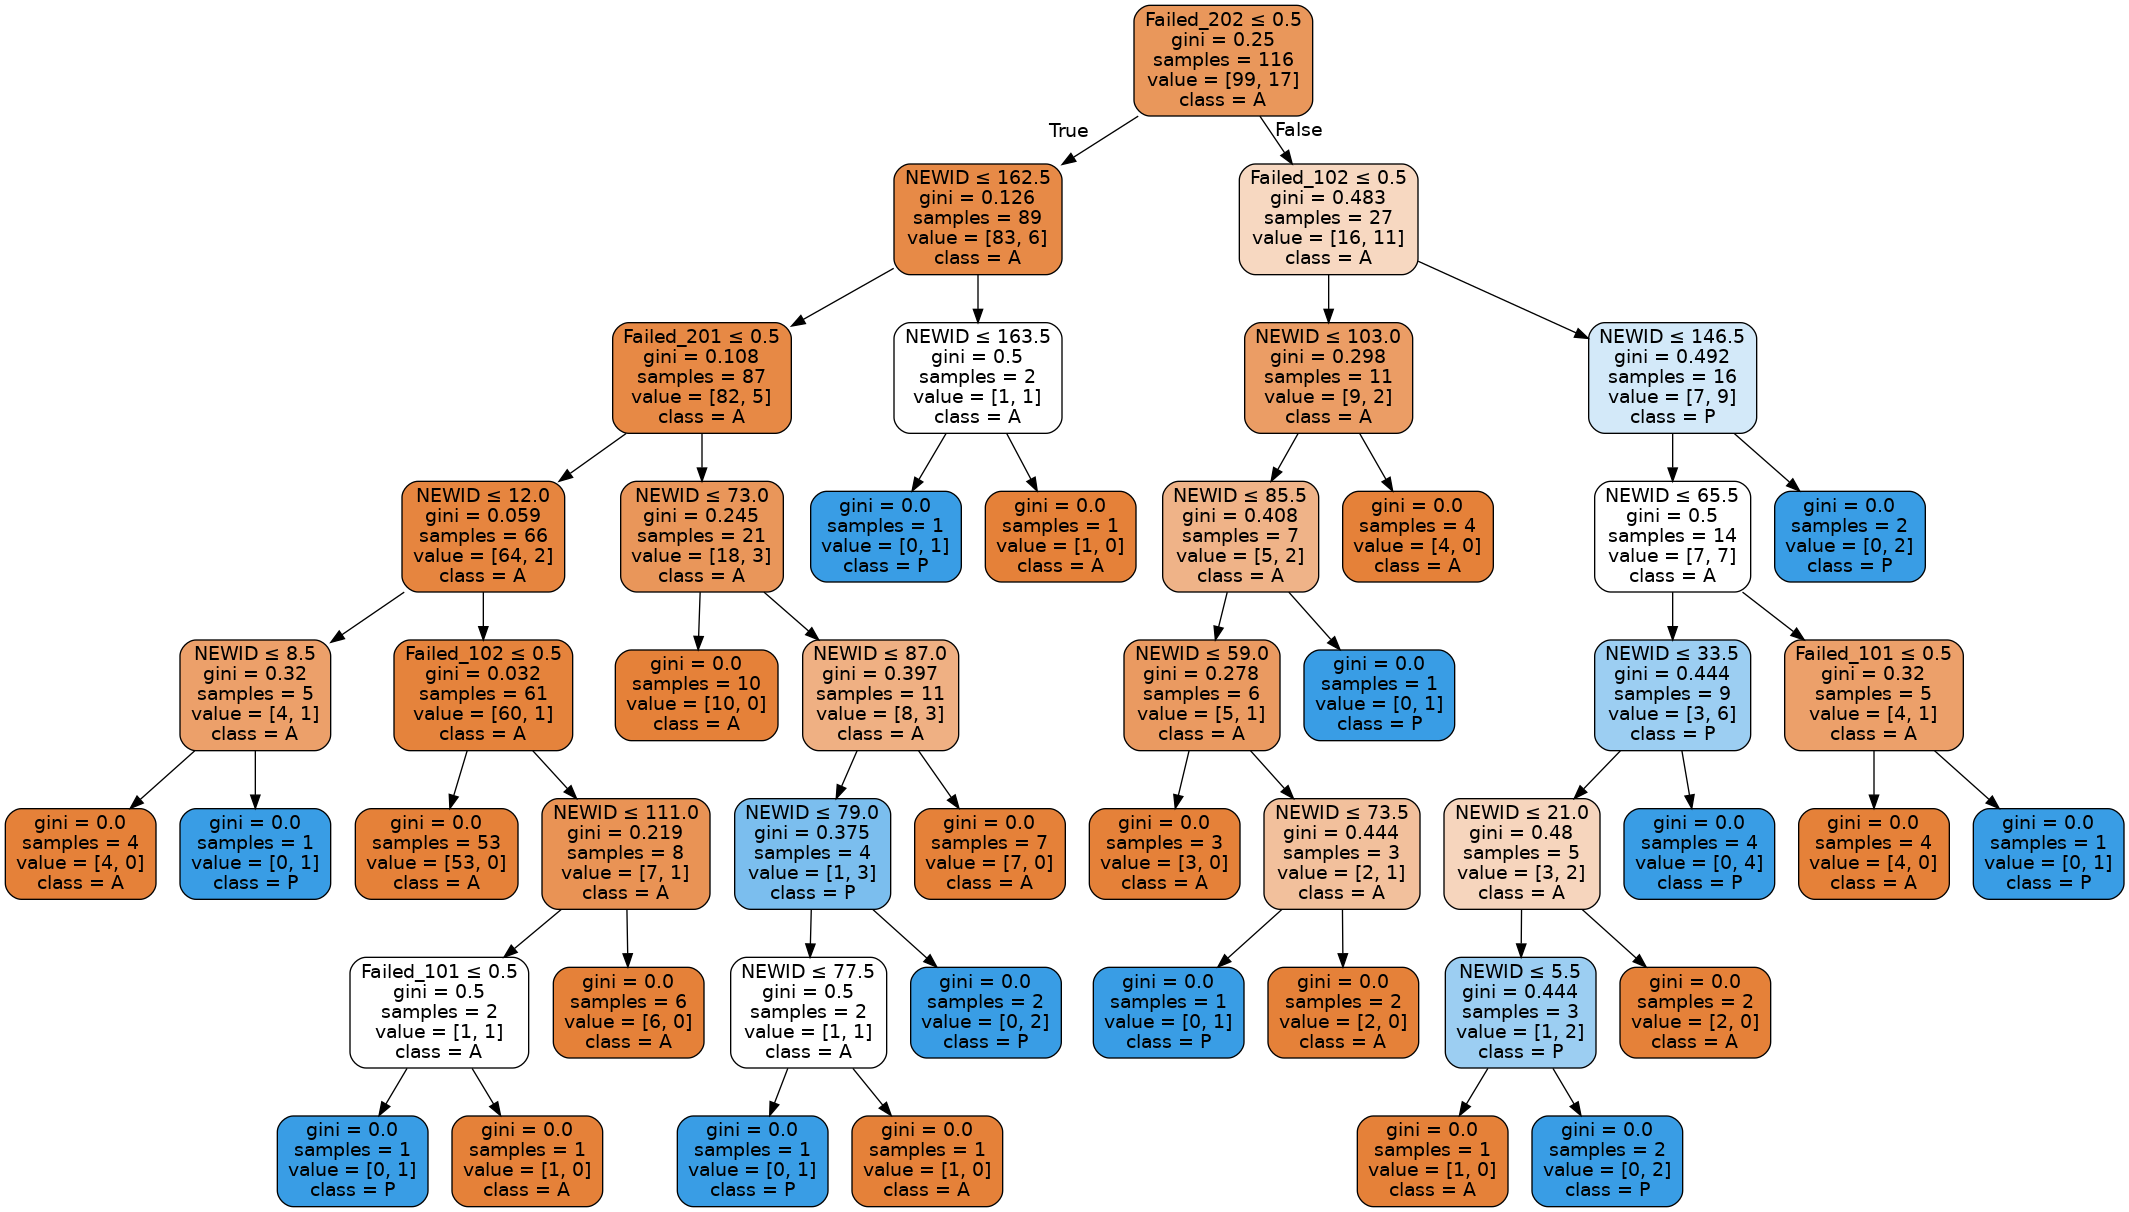

In [12]:


dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['A','P'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())